# Lab 1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle

---

## Linear regression 1D

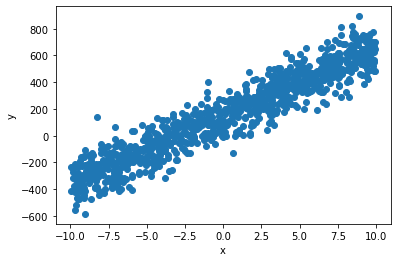

In [119]:
# X
size = 1000
val_min, val_max = -10, 10
X = np.random.uniform(val_min, val_max, size)

# Noise
N = np.random.normal(size = size, scale = 100)

# Y = aX + b + N
a, b = 50, 150
Y = a*X + b + N
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [120]:
# Initial settings
a_pred, b_pred = 0, 0
lr = 0.01
batch_size = 32

# Algorithm
for epoch in range(1000):
    for step in range(0, size, batch_size):
        da = (-(Y[step:(step+batch_size)] - a_pred*X[step:(step+batch_size)] - b_pred)*X[step:(step+batch_size)]).mean()
        a_pred -= lr*da
        
        db = -(Y[step:(step+batch_size)] - a_pred*X[step:(step+batch_size)] - b_pred).mean()
        b_pred -= lr*db
    
    # Learning rate adjustments
    if epoch % 100 == 0 and epoch != 0:
        lr /= 10

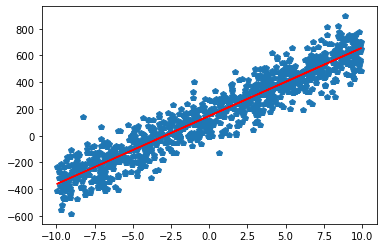

a=50.00, a_pred=50.96
b=150.00, b_pred=148.05


In [121]:
# Displaying data
plt.plot(X, Y, 'p')

# Predicted line

Y_pred = a_pred*X + b_pred
plt.plot(X, Y_pred, color='red')
plt.show()

print(f"a={a:.2f}, a_pred={a_pred:.2f}")
print(f"b={b:.2f}, b_pred={b_pred:.2f}")

---

## Logistical regression 2D

In [122]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

In [123]:
# X1, X2
size = 1000
X1_center, X2_center = (12, 34), (-56, -7)

X1 = np.random.normal(size=(size,2), scale=10,loc = X1_center)
X2 = np.random.normal(size=(size,2), scale=10,loc = X2_center)

X = np.concatenate([X1, X2])
Y = np.ones(2*size)
Y[:size] = 0
Y[size:] = 1
indexes = np.arange(2*size)
shuffle(indexes)
X, Y = X[indexes], Y[indexes]

In [124]:
# Algorithm
a_pred = np.array([-5., 3]).reshape(2, 1)
b_pred = np.array([-120.])
lr = 0.1
for epoch in range(3000):
    for step in range(0, size, batch_size):
        x_batch = X[step:(step+batch_size)]
        diff = -(Y[step:(step+batch_size), None] - sigmoid(x_batch.dot(a_pred) + b_pred))
        da = (x_batch.T.dot(diff))
        db = diff.mean()
        a_pred -= lr*da.reshape(2, 1)
        b_pred -= lr*db.reshape(1,)
    if epoch % 1000 == 0:
        lr /= 10
        Y_predicted = (sigmoid(X.dot(a_pred) + b_pred) > 0.5).astype(np.int8)
        accuracy = (Y_predicted[:, 0] == Y).mean()

<ipython-input-122-6689c1cae93f>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Accuracy = 1.00


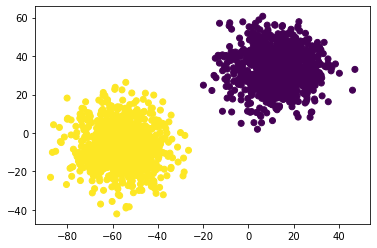

In [125]:
# Displaying data
plt.scatter(X[:,0], X[:,1], c=Y)

print(f"Accuracy = {accuracy:.2f}")